In [1]:
import sys
sys.path.insert(1, '../..')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from ProdSeqAnalysis_utils import *
# plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams["font.family"] = "Arial"
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
S02315_UMIpath = "/path/to/S02315_output.DepthNormedUMIPairs.tsv"
UMI_cnts_signal, UMI_cnts_nms, UMI_cnts_pairnms = ReadProdTSVFile(S02315_UMIpath)

In [3]:
bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

color_thres_num = 50
colors1 = plt.cm.Greens(np.linspace(0, 1, color_thres_num))
colors2 = plt.cm.Greens(np.linspace(1, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
customized_cmap.set_bad(color='black')

In [4]:
UMI_cnts_nms

['S02315_3.3WT_B1T1',
 'S02315_3.3WT_B1T2',
 'S02315_3.3K27M_B1T1',
 'S02315_3.3K27M_B1T2']

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

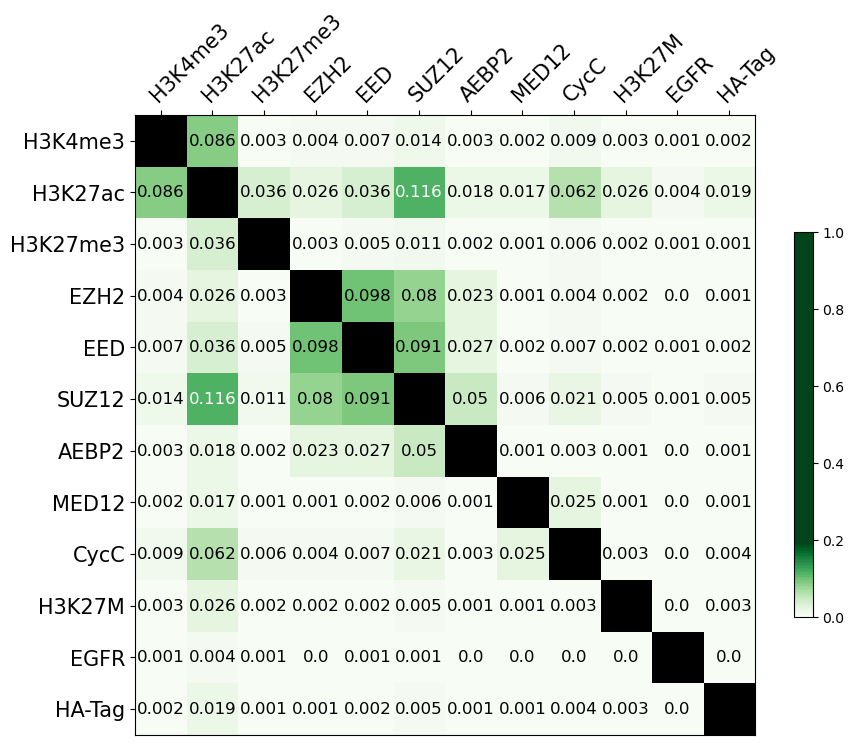

In [5]:
WT_props = UMI_cnts_signal[0]
WT_mat = np.zeros((len(bc_nms), len(bc_nms)))
linear_idx = 0
for i in range(len(bc_nms)):
    WT_mat[i][i] = np.nan
    for j in range(i + 1, len(bc_nms)):
        WT_mat[i][j] = (WT_props[linear_idx]) / sum(WT_props)
        WT_mat[j][i] = (WT_props[linear_idx]) / sum(WT_props)
        linear_idx += 1
    
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(WT_mat, cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(len(bc_nms)))
ax.set_yticks(np.arange(len(bc_nms)))
ax.set_xticklabels(bc_nms, fontsize = 15)
ax.set_yticklabels(bc_nms, fontsize = 15)
ax.xaxis.tick_top()
fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        if (i == j):
            continue
        curr_val = round((WT_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j, i, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("S02315_WT.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

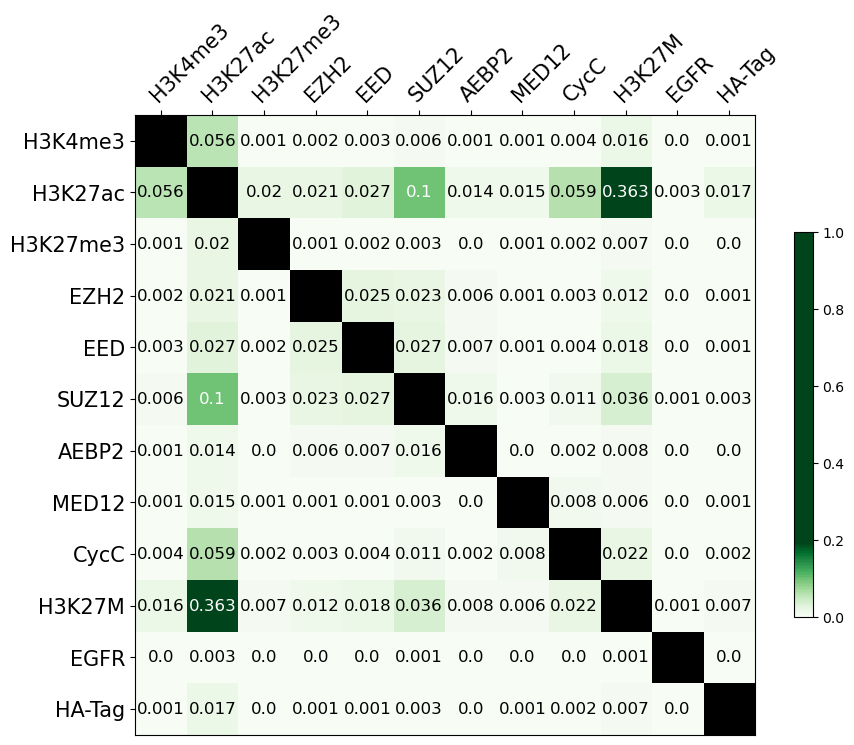

In [6]:
K27M_props = UMI_cnts_signal[2]
K27M_mat = np.zeros((len(bc_nms), len(bc_nms)))
linear_idx = 0
for i in range(len(bc_nms)):
    K27M_mat[i][i] = np.nan
    for j in range(i + 1, len(bc_nms)):
        K27M_mat[i][j] = (K27M_props[linear_idx]) / sum(K27M_props)
        K27M_mat[j][i] = (K27M_props[linear_idx]) / sum(K27M_props)
        linear_idx += 1
    
fig, ax = plt.subplots(figsize = (10, 10))
im = ax.imshow(K27M_mat, cmap = customized_cmap, vmin = 0, vmax = 1)

ax.set_xticks(np.arange(len(bc_nms)))
ax.set_yticks(np.arange(len(bc_nms)))
ax.set_xticklabels(bc_nms, fontsize = 15)
ax.set_yticklabels(bc_nms, fontsize = 15)
ax.xaxis.tick_top()
fig.colorbar(im, ax = ax, shrink = 0.5)
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(bc_nms)):
    for j in range(len(bc_nms)):
        if (i == j):
            continue
        curr_val = round((K27M_mat[i][j]), 3)
        if (curr_val < 0.1):
            colorUse = "k"
        else:
            colorUse = "white"
        text = ax.text(j, i, curr_val,
                       ha = "center", va = "center", color = colorUse, fontsize = 12)

# fig.savefig("S02315_K27M_heatmap.svg", dpi = 1200)

In [7]:
S15bio1_signalpath = "/path/to/S02315_bio1_output.PPIEnrichment.tsv"
S15bio1_signals, S15bio1_nms, S15bio1_pairnms = ReadProdTSVFile(S15bio1_signalpath)

S15bio2_signalpath = "/path/to/S02315_bio2_output.PPIEnrichment.tsv"
S15bio2_signals, S15bio2_nms, S15bio2_pairnms = ReadProdTSVFile(S15bio2_signalpath)

S15_signals = [
    S15bio2_signals[1],
    S15bio2_signals[0],
    S15bio1_signals[1],
    S15bio1_signals[0],
    S15bio2_signals[3],
    S15bio2_signals[2],
    S15bio1_signals[3],
    S15bio1_signals[2],
]

S15_pairnms = S15bio2_pairnms

S15_signals_normed = []
for row in S15_signals:
    S15_signals_normed.append([x/row[49] for x in row])

S15_nms = [
    S15bio2_nms[1],
    S15bio2_nms[0],
    S15bio1_nms[1],
    S15bio1_nms[0],
    S15bio2_nms[3],
    S15bio2_nms[2],
    S15bio1_nms[3],
    S15bio1_nms[2],
]

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

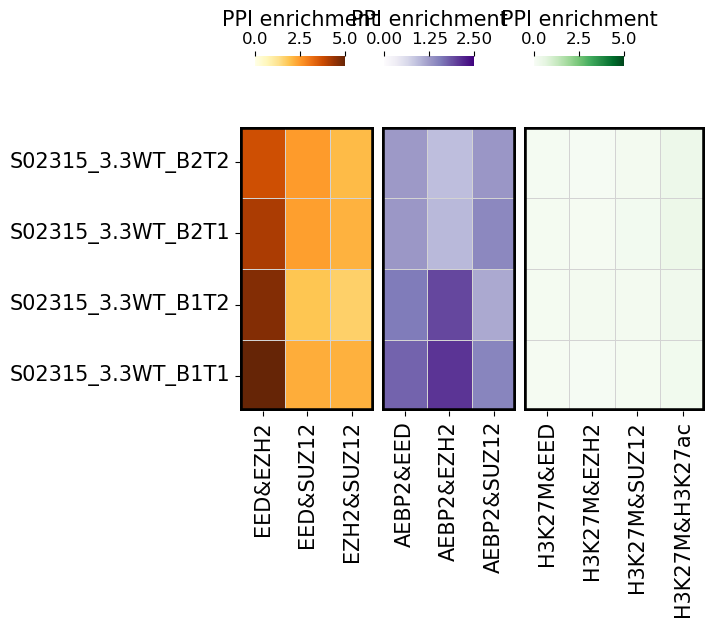

In [8]:
plot_cmaps = [
    sns.color_palette("YlOrBr", as_cmap = True),
    sns.color_palette("Purples", as_cmap = True),
    sns.color_palette("Greens", as_cmap = True),
    sns.color_palette("Blues", as_cmap = True),
]

PPI_plot_groups = [
    ["EED&EZH2", "EED&SUZ12", "EZH2&SUZ12"],
    ["AEBP2&EED", "AEBP2&EZH2", "AEBP2&SUZ12"],
    ["H3K27M&EED", "H3K27M&EZH2", "H3K27M&SUZ12", "H3K27M&H3K27ac"],
]

fig = GroupedPPIHeatmap(S15_signals_normed[0:4], S15_nms[0:4], S15_pairnms, bc_pair_groups = PPI_plot_groups,
                  plot_cmaps = plot_cmaps,
                  sample_group_sizes = [4, 4], plot_vmax = [5, 2.5, 5],
                  cbar_ax_locs = [
                      [0.15, 0.8, 0.15, 0.02],
                      [0.365, 0.8, 0.15, 0.02],
                      [0.615, 0.8, 0.15, 0.02],
                  ],
                  plot_size = (6, 5)
                 )

# fig.savefig("S02315_unmerge_left.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

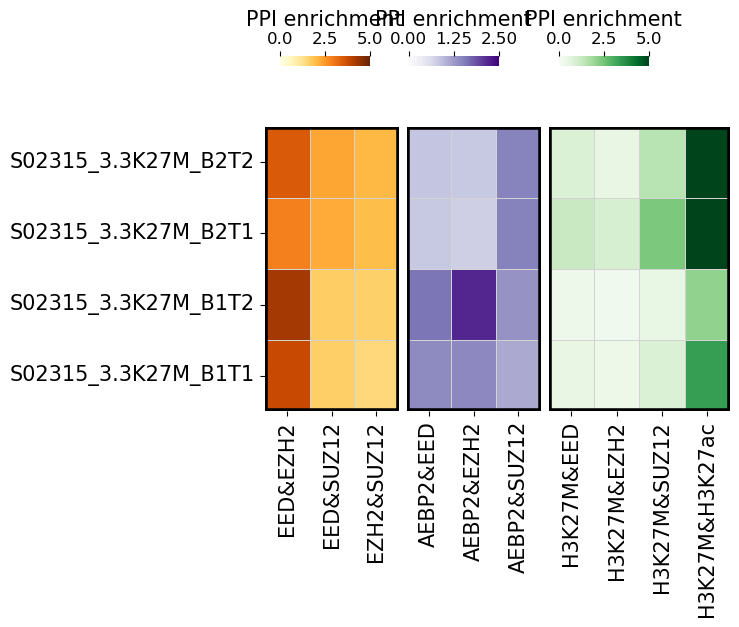

In [9]:
fig = GroupedPPIHeatmap(S15_signals_normed[4:8], S15_nms[4:8], S15_pairnms, bc_pair_groups = PPI_plot_groups,
                  plot_cmaps = plot_cmaps,
                  sample_group_sizes = [4, 4], plot_vmax = [5, 2.5, 5],
                  cbar_ax_locs = [
                      [0.15, 0.8, 0.15, 0.02],
                      [0.365, 0.8, 0.15, 0.02],
                      [0.615, 0.8, 0.15, 0.02],
                  ],
                  plot_size = (6, 5)
                 )

# fig.savefig("S02315_unmerge_right.svg", dpi = 1200)

In [10]:
otheroption_signalpath = "/path/to/S02315_output.PPIEnrichment.tsv" # As in main figure but without averaging replicates
otheroption_signals_unorder, otheroption_nms_unorder, otheroption_pairnms = ReadProdTSVFile(otheroption_signalpath)

reorder_idx = [7, 6, 3, 2, 5, 4, 1, 0]
otheroption_nms = [otheroption_nms_unorder[x] for x in reorder_idx]
otheroption_signals_normed = []
for idx in reorder_idx:
    curr_row = otheroption_signals_unorder[idx]
    otheroption_signals_normed.append([x / curr_row[49] for x in curr_row])

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

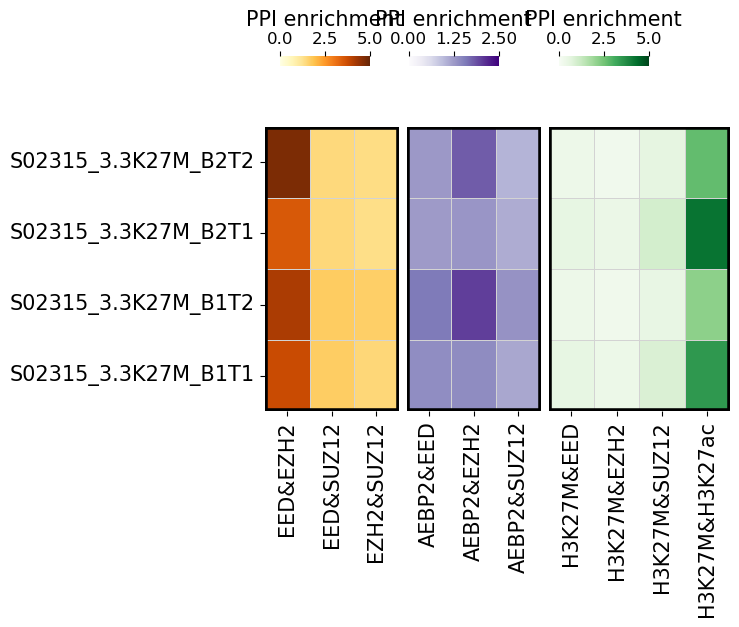

In [11]:
fig = GroupedPPIHeatmap(otheroption_signals_normed[0:4], otheroption_nms[0:4], S15_pairnms, bc_pair_groups = PPI_plot_groups,
                  plot_cmaps = plot_cmaps,
                  sample_group_sizes = [4, 4], plot_vmax = [5, 2.5, 5],
                  cbar_ax_locs = [
                      [0.15, 0.8, 0.15, 0.02],
                      [0.365, 0.8, 0.15, 0.02],
                      [0.615, 0.8, 0.15, 0.02],
                  ],
                  plot_size = (6, 5)
                 )

# fig.savefig("S02315_otheroption_left.svg", dpi = 1200)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

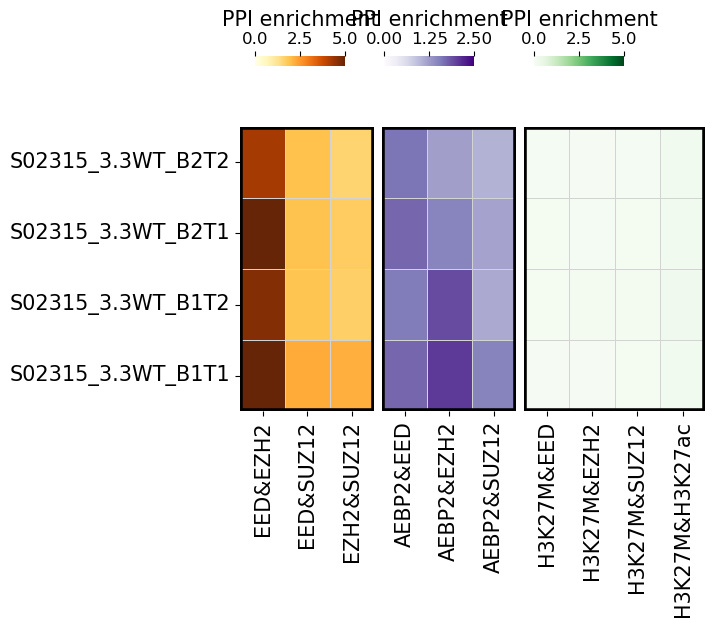

In [12]:
fig = GroupedPPIHeatmap(otheroption_signals_normed[4:8], otheroption_nms[4:8], S15_pairnms, bc_pair_groups = PPI_plot_groups,
                  plot_cmaps = plot_cmaps,
                  sample_group_sizes = [4, 4], plot_vmax = [5, 2.5, 5],
                  cbar_ax_locs = [
                      [0.15, 0.8, 0.15, 0.02],
                      [0.365, 0.8, 0.15, 0.02],
                      [0.615, 0.8, 0.15, 0.02],
                  ],
                  plot_size = (6, 5)
                 )
# fig.savefig("S02315_otheroption_right.svg", dpi = 1200)